In [1]:
#load_gcb_land2021
#fgco2, spco2

In [2]:
#after changes in the script using Jupyter notebook, save, and run this:
get_ipython().system(u'jupyter nbconvert --to=python load_gcb_land-subsampling.ipynb')

[NbConvertApp] WARNING | pattern 'load_gcb_land-subsampling.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour i

In [3]:
#############
#--- load modules -------

import numpy as np 
from netCDF4 import Dataset
import matplotlib.pyplot as plt


import sys
import os
sys.path.append('../')


import numpy.matlib
import seawater as sw
#package to acces sw.dist similar to matlab
#version 3.3.4

import importlib
import os.path
import time


#----- input data paths: ------

## input data
indir = '/work/ollie/jhauck/subsampling/landschutzer/'
fileA = 'SOM-FFN_AWI_SOCAT_pCO2_fgco2.nc'
fileB = 'SOM-FFN_AWI_SOCAT_SOCCOM_pCO2_fgco2.nc'
fileC = 'SOM-FFN_AWI_ideal_pCO2_fgco2.nc'

#------ prep for calculating area: ----------

### define 1x1 grid
xax = np.arange(0.5,360.5,1)
yax = np.arange(-89.5,90.5,1)


### define 1x1 grid
xaxi_1x1 = range(1,361) 
yaxi_1x1 = range(-90,91)

xi = np.arange(-180,181,1) #longitude
yi = np.arange(-90,91,1) #latitude


Aarea = np.zeros((len(xi)-1,len(yi)-1))

#calculate area
for i in range(0,len(xi)-1): #laenge pruefen!
    for j in range(0,len(yi)-1): #laenge pruefen!
        #sw_dist aus matlab umsetzen
        dist1 = sw.dist([yi[j],yi[j+1]],[xi[i],xi[i]])
        dist2 = sw.dist([yi[j],yi[j]],[xi[i],xi[i+1]])
        Aarea[i][j] = float(dist1[0]) * float(dist2[0]) *1000 *1000 #m2
#flachen ueberall gleich gross?
Aarea = Aarea.transpose()


In [4]:
####------ first files based on SOCAT distribution only--------


### loading data for fgco2
in_data = Dataset(indir+fileA, mode='r')


#--------- then SOCAT + SOCCOM

in_dataB = Dataset(indir+fileB, mode='r')

#--------- then ideal

in_dataC = Dataset(indir+fileC, mode='r')


#print in_data.dimensions.keys()

#yax_land = in_data['lat'][:]
#print yax_land

In [5]:
### fgco2 : SOCAT-only

fgco2_smoothed = in_data['fgCO2_SOMFFN'][:]

#replace fillvalue with NaN
fgco2_smoothed[fgco2_smoothed > 1e19] = np.nan
fgco2_smoothed = np.ma.filled(fgco2_smoothed, fill_value=np.nan)



fgco2_smoothedB = np.nan * np.zeros(np.shape(fgco2_smoothed))
fgco2_smoothedB[:,:,0:180] = fgco2_smoothed[:,:,180:]
fgco2_smoothedB[:,:,180:] = fgco2_smoothed[:,:,0:180]


# fgco2 is in mol/m2/year, so need to convert to mol/m2/s
# /365/86400
# change sign
# add 'A' to name for model name convention
land_fgco2_1x1_A = -fgco2_smoothedB/86400/365.25

print('fgco2 min {} max {} nansum {}'.format(np.nanmin(land_fgco2_1x1_A),np.nanmax(land_fgco2_1x1_A),np.nansum(np.nansum(np.nansum(land_fgco2_1x1_A)))))
#np.save('../temp_data_storage/land_fgco2_1x1.npy', land_fgco2_1x1_A)
print(np.shape(land_fgco2_1x1_A))

np.save('land_fgco2_1x1_A_subsampling.npy',land_fgco2_1x1_A)


<ipython-input-5-da9d60260e30>:3: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  fgco2_smoothed = in_data['fgCO2_SOMFFN'][:]


fgco2 min -1.8470690519778838e-06 max 7.240295434332342e-07 nansum 0.38297212615292714
(444, 180, 360)


In [6]:
# check time:

time_sec = in_data['time'][:]
time_days = time_sec/60/60/24
time_years = 2000 + time_days/365
print(time_years)

[1982.027397260274 1982.1123287671232 1982.1890410958904
 1982.2739726027398 1982.3561643835617 1982.441095890411
 1982.5232876712328 1982.6082191780822 1982.6931506849314
 1982.7753424657535 1982.8602739726027 1982.9424657534246
 1983.027397260274 1983.1123287671232 1983.1890410958904
 1983.2739726027398 1983.3561643835617 1983.441095890411
 1983.5232876712328 1983.6082191780822 1983.6931506849314
 1983.7753424657535 1983.8602739726027 1983.9424657534246
 1984.027397260274 1984.1123287671232 1984.1917808219177
 1984.2767123287672 1984.358904109589 1984.4438356164383
 1984.5260273972603 1984.6109589041096 1984.695890410959
 1984.7780821917809 1984.86301369863 1984.945205479452 1985.0301369863014
 1985.1150684931506 1985.1917808219177 1985.2767123287672
 1985.358904109589 1985.4438356164383 1985.5260273972603
 1985.6109589041096 1985.695890410959 1985.7780821917809 1985.86301369863
 1985.945205479452 1986.0301369863014 1986.1150684931506
 1986.1917808219177 1986.2767123287672 1986.35890

In [7]:
### spco2

spco2_smoothed = in_data['pCO2_SOMFFN'][:]
#print np.shape(spco2_smoothed)

#replace fillvalue with NaN
spco2_smoothed[spco2_smoothed > 1e19] = np.nan

land_spco2_1x1_A = np.nan * np.zeros(np.shape(spco2_smoothed))
land_spco2_1x1_A[:,:,0:180] = spco2_smoothed[:,:,180:]
land_spco2_1x1_A[:,:,180:] = spco2_smoothed[:,:,0:180]



print('spco2 min {} max {}'.format(np.nanmin(land_spco2_1x1_A),np.nanmax(land_spco2_1x1_A)))
print(np.shape(land_spco2_1x1_A))
#np.save('../temp_data_storage/land_spco2_1x1.npy', land_spco2_1x1)

np.save('land_spco2_1x1_A_subsampling.npy',land_spco2_1x1_A)


<ipython-input-7-4fbe3169bacd>:3: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  spco2_smoothed = in_data['pCO2_SOMFFN'][:]


spco2 min 143.4293975830078 max 1237.5306396484375
(444, 180, 360)


In [8]:
### fgco2 : SOCAT+ SOCCOM

fgco2_smoothed = in_dataB['fgCO2_SOMFFN'][:]

#replace fillvalue with NaN
fgco2_smoothed[fgco2_smoothed > 1e19] = np.nan
fgco2_smoothed = np.ma.filled(fgco2_smoothed, fill_value=np.nan)



fgco2_smoothedB = np.nan * np.zeros(np.shape(fgco2_smoothed))
fgco2_smoothedB[:,:,0:180] = fgco2_smoothed[:,:,180:]
fgco2_smoothedB[:,:,180:] = fgco2_smoothed[:,:,0:180]


# fgco2 is in mol/m2/year, so need to convert to mol/m2/s
# /365/86400
# change sign
# add 'A' to name for model name convention
land_fgco2_1x1_B = -fgco2_smoothedB/86400/365.25

print('fgco2 min {} max {} nansum {}'.format(np.nanmin(land_fgco2_1x1_B),np.nanmax(land_fgco2_1x1_B),np.nansum(np.nansum(np.nansum(land_fgco2_1x1_B)))))
#np.save('../temp_data_storage/land_fgco2_1x1.npy', land_fgco2_1x1_A)
print(np.shape(land_fgco2_1x1_B))

np.save('land_fgco2_1x1_B_subsampling.npy',land_fgco2_1x1_B)

#---------
### spco2

spco2_smoothed = in_dataB['pCO2_SOMFFN'][:]
#print np.shape(spco2_smoothed)

#replace fillvalue with NaN
spco2_smoothed[spco2_smoothed > 1e19] = np.nan

land_spco2_1x1_B = np.nan * np.zeros(np.shape(spco2_smoothed))
land_spco2_1x1_B[:,:,0:180] = spco2_smoothed[:,:,180:]
land_spco2_1x1_B[:,:,180:] = spco2_smoothed[:,:,0:180]



print('spco2 min {} max {}'.format(np.nanmin(land_spco2_1x1_B),np.nanmax(land_spco2_1x1_B)))
print(np.shape(land_spco2_1x1_B))
np.save('land_spco2_1x1_B_subsampling.npy',land_spco2_1x1_B)

#np.save('../temp_data_storage/land_spco2_1x1.npy', land_spco2_1x1)

<ipython-input-8-52042bb19d9a>:3: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  fgco2_smoothed = in_dataB['fgCO2_SOMFFN'][:]


fgco2 min -2.1515503749740553e-06 max 7.342304642954099e-07 nansum 0.3761061656572818
(444, 180, 360)


<ipython-input-8-52042bb19d9a>:31: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  spco2_smoothed = in_dataB['pCO2_SOMFFN'][:]


spco2 min 66.63713836669922 max 1836.070556640625
(444, 180, 360)


In [9]:
### fgco2 : ideal

fgco2_smoothed = in_dataC['fgCO2_SOMFFN'][:]

#replace fillvalue with NaN
fgco2_smoothed[fgco2_smoothed > 1e19] = np.nan
fgco2_smoothed = np.ma.filled(fgco2_smoothed, fill_value=np.nan)



fgco2_smoothedB = np.nan * np.zeros(np.shape(fgco2_smoothed))
fgco2_smoothedB[:,:,0:180] = fgco2_smoothed[:,:,180:]
fgco2_smoothedB[:,:,180:] = fgco2_smoothed[:,:,0:180]


# fgco2 is in mol/m2/year, so need to convert to mol/m2/s
# /365/86400
# change sign
# add 'A' to name for model name convention
land_fgco2_1x1_C = -fgco2_smoothedB/86400/365.25

print('fgco2 min {} max {} nansum {}'.format(np.nanmin(land_fgco2_1x1_C),np.nanmax(land_fgco2_1x1_C),np.nansum(np.nansum(np.nansum(land_fgco2_1x1_C)))))
#np.save('../temp_data_storage/land_fgco2_1x1.npy', land_fgco2_1x1_A)
print(np.shape(land_fgco2_1x1_C))

np.save('land_fgco2_1x1_C_subsampling.npy',land_fgco2_1x1_C)

#---------
### spco2

spco2_smoothed = in_dataC['pCO2_SOMFFN'][:]
#print np.shape(spco2_smoothed)

#replace fillvalue with NaN
spco2_smoothed[spco2_smoothed > 1e19] = np.nan

land_spco2_1x1_C = np.nan * np.zeros(np.shape(spco2_smoothed))
land_spco2_1x1_C[:,:,0:180] = spco2_smoothed[:,:,180:]
land_spco2_1x1_C[:,:,180:] = spco2_smoothed[:,:,0:180]



print('spco2 min {} max {}'.format(np.nanmin(land_spco2_1x1_C),np.nanmax(land_spco2_1x1_C)))
print(np.shape(land_spco2_1x1_C))
#np.save('../temp_data_storage/land_spco2_1x1.npy', land_spco2_1x1)

np.save('land_spco2_1x1_C_subsampling.npy',land_spco2_1x1_C)


<ipython-input-9-66210c578032>:3: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  fgco2_smoothed = in_dataC['fgCO2_SOMFFN'][:]


fgco2 min -3.1425274348903872e-06 max 9.892439967335398e-07 nansum 0.3520709348342682
(444, 180, 360)


<ipython-input-9-66210c578032>:31: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  spco2_smoothed = in_dataC['pCO2_SOMFFN'][:]


spco2 min 61.234161376953125 max 2383.06298828125
(444, 180, 360)


../gcb_plt.py:64: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmap.set_bad('white',1.)


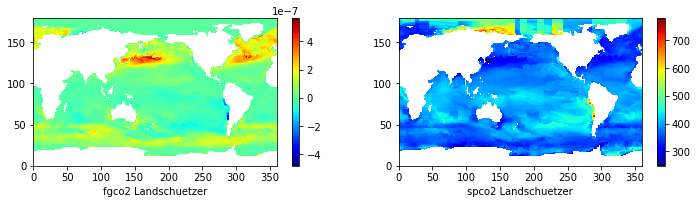

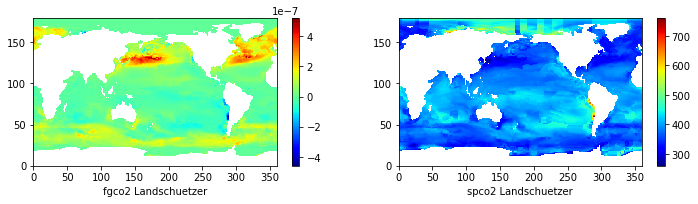

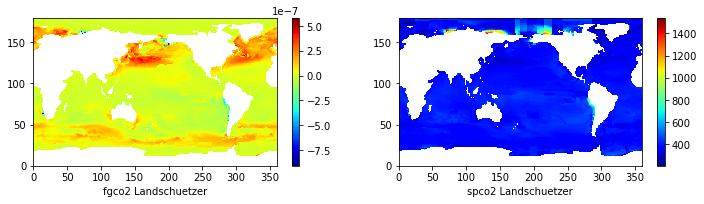

In [10]:
if __name__ == '__main__':
    from gcb_plt import plt_2subs
    
    plt_2subs(land_fgco2_1x1_A[-1,:,:],'fgco2 Landschuetzer',land_spco2_1x1_A[-1,:,:],'spco2 Landschuetzer')
    plt.show()
    
    plt_2subs(land_fgco2_1x1_B[-1,:,:],'fgco2 Landschuetzer',land_spco2_1x1_B[-1,:,:],'spco2 Landschuetzer')
    plt.show()
    
    plt_2subs(land_fgco2_1x1_C[-1,:,:],'fgco2 Landschuetzer',land_spco2_1x1_C[-1,:,:],'spco2 Landschuetzer')
    plt.show()

if False:
    plt.figure()
    plt.subplot(2,2,1)
    plt.pcolor(xax,yax,land_fgco2_1x1_A[-1,:,:], vmin=np.nanmin(land_fgco2_1x1_A), vmax=np.nanmax(land_fgco2_1x1_A))
    plt.xlabel('fgco2 Landschuetzer')
    plt.colorbar()
    #plt.show()plt.subplot(2,2,2)
    plt.pcolor(xax,yax,land_spco2_1x1_A[-1,:,:], vmin=0, vmax=750)
    plt.xlabel('spco2 Landschuetzer')
    plt.colorbar()
    plt.show()

